## Question 1 (Auto.csv)
For more info on plot point styling, click [here](http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r)

Assumptions of linear regression:
- $Y_i$ has same variance
- Mean($Y_i$) = $E(Y_i|x)=\beta_0 + \beta' x$
- Error terms are normally didstributed with mean 0
- Error terms are independent on one another

- $Var(\beta_0) = (X'X)^{-1}X\widetilde{Y}$

### Part 1A & 1E (checked)

'data.frame':	397 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : Factor w/ 94 levels "?","100","102",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


Call:
lm(formula = mpg ~ horsepower, data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


[1] 392


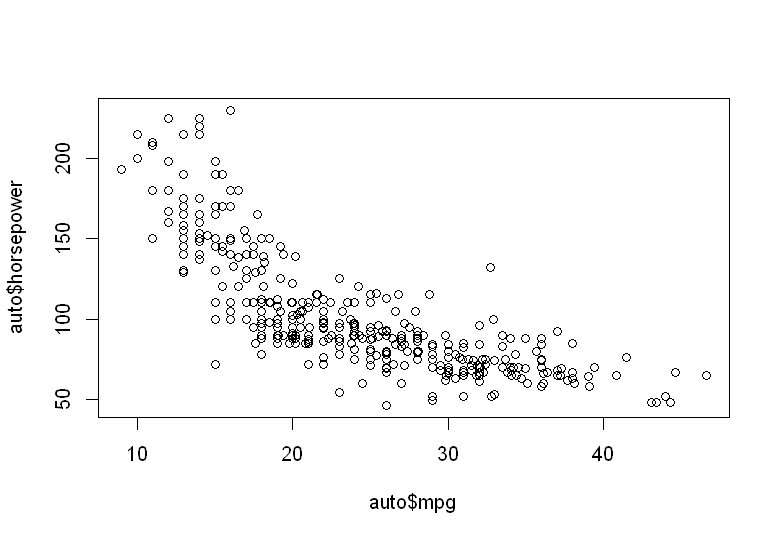

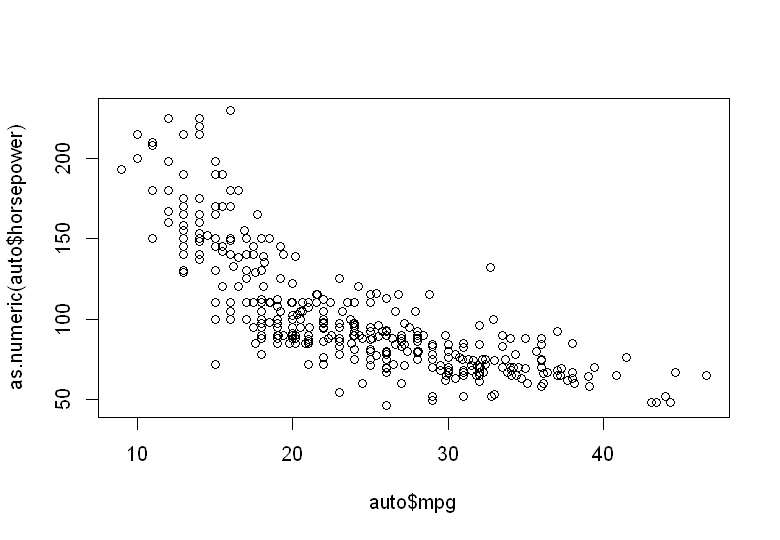

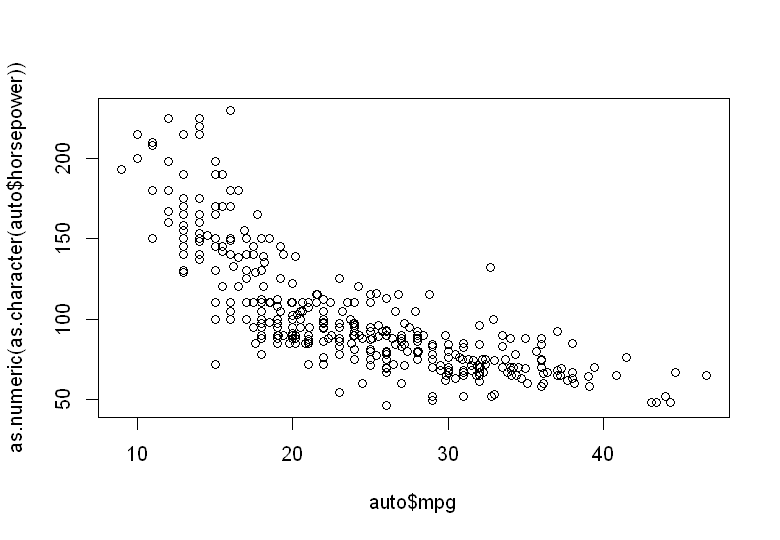

In [6]:
options(repr.plot.width=6.5, repr.plot.height=4.5) # resize IRkernel plot size
auto <- read.csv("csv/Auto.csv")
str(auto)

# fit model of HP vs mpg
auto$horsepower <- as.numeric(as.character(auto$horsepower))
model1A <- lm(mpg~horsepower, data=auto)
summary(model1A)

# can observe there are 392 full observations (but 94 "factors")
# hence, need to change datatype from factor to number
print(nrow(model.frame(model1A)))

# HP variable changed because original datatype is factor, not integer
# Also, because HP lies on a continuous spectrum, not categories
plot(auto$mpg, auto$horsepower)
abline(model1A)
plot(auto$mpg, as.numeric(auto$horsepower))
abline(model1A)
plot(auto$mpg, as.numeric(as.character(auto$horsepower)))
abline(model1A)
# why the difference between the two plots?

### Part 1B (checked)

Based on the $r^2$ values alone, it can be said there is a moderately strong correlation between **mpg** and **horsepower**. Given the negative value of $r$ that is considerably close to $1$, it can be said there the correlation is negative.

In [7]:
cor(auto$mpg, as.numeric(as.character(auto$horsepower)), use="pairwise.complete.obs")
?cor

[1] -0.7784268

### Part 1C (checked)

In [8]:
predict(model1A, data.frame(horsepower=98), interval="confidence", level=0.99)

,fit,lwr,upr
1,24.46708,23.81669,25.11747


### Part 1D (checked)
As calculated earlier, correlation coefficient $r=-0.7784$. This means the predictor variable is negatively and linearly correlated with the response to a significant extent. However, when comparing to the graph, we can see a clear negative correlation in a non-linear fashion, possibly explaining the relatively low $r$ value for such a clear negative correlation.

### Part 1F (checked)

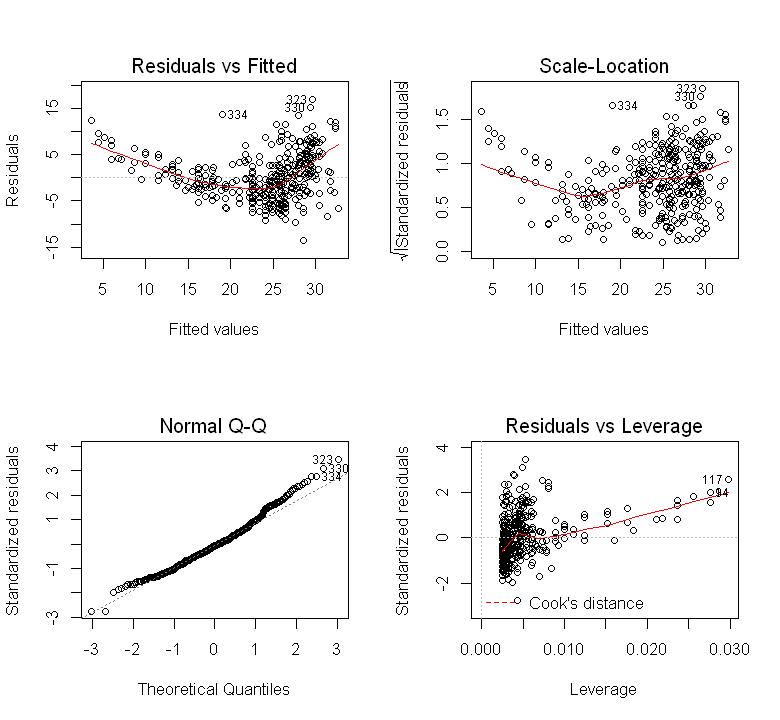

In [9]:
options(repr.plot.width=6.5, repr.plot.height=6) # resize IRkernel plot size
layout(matrix(1:4,2,2))
plot(model1A)

## Question 2
For more info on plot point styling, click [here](http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r).
### Part 2A (checked)

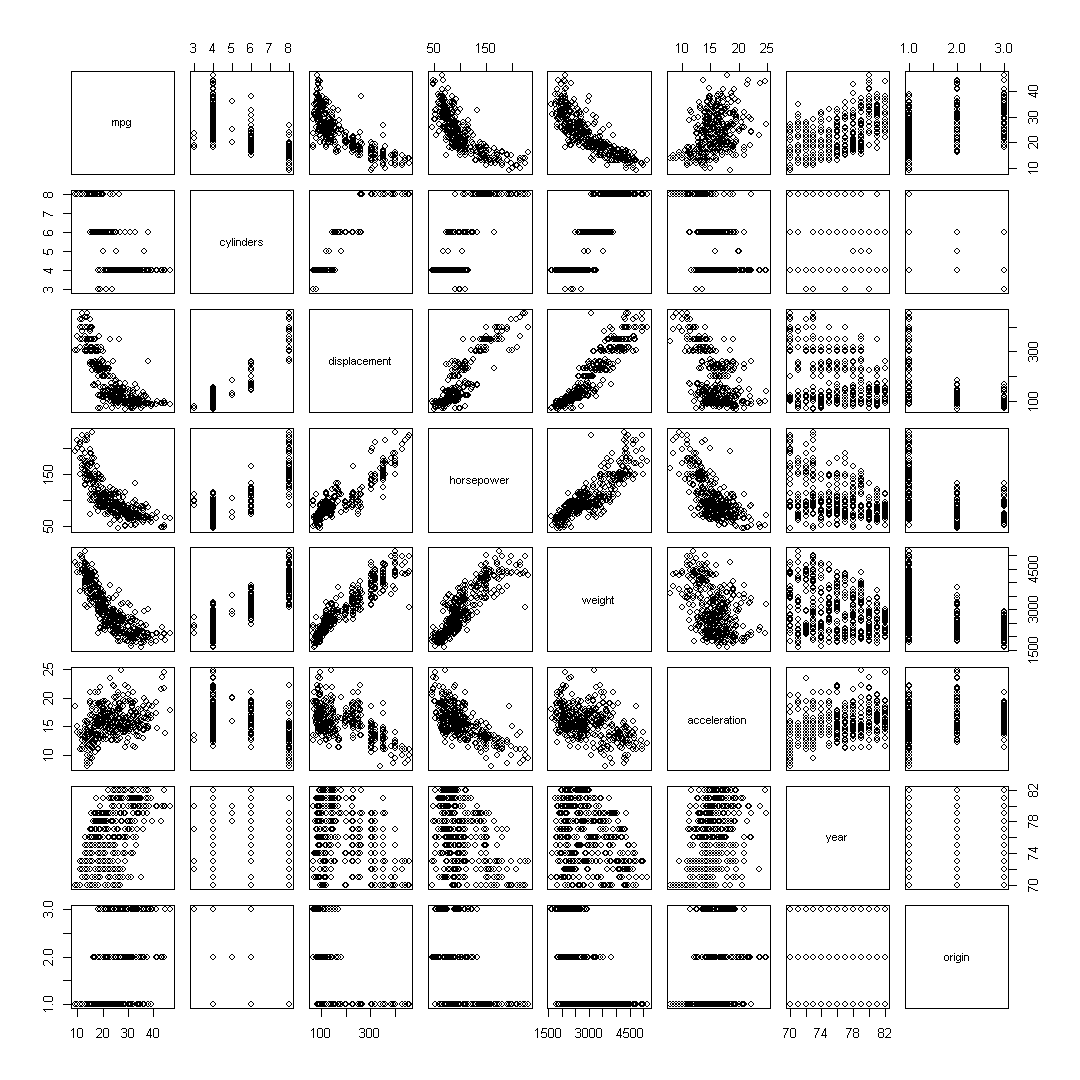

In [10]:
options(repr.plot.width=9, repr.plot.height=9) # resize IRkernel plot size
pairs(auto[1:8])

### Part 2B (checked)

In [11]:
cor(auto[1:8], use="pairwise.complete.obs")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7762599,-0.8044430,-0.7784268,-0.8317389,0.4222974,0.5814695,0.5636979
cylinders,-0.7762599,1.0000000,0.9509199,0.8429834,0.8970169,-0.5040606,-0.3467172,-0.5649716
displacement,-0.8044430,0.9509199,1.0000000,0.8972570,0.9331044,-0.5441618,-0.3698041,-0.6106643
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8317389,0.8970169,0.9331044,0.8645377,1.0000000,-0.4195023,-0.3079004,-0.5812652
acceleration,0.4222974,-0.5040606,-0.5441618,-0.6891955,-0.4195023,1.0000000,0.2829009,0.2100836
year,0.5814695,-0.3467172,-0.3698041,-0.4163615,-0.3079004,0.2829009,1.0000000,0.1843141
origin,0.5636979,-0.5649716,-0.6106643,-0.4551715,-0.5812652,0.2100836,0.1843141,1.0000000


### Part 2C

Some predictors do not have strong correlation with **mpg**; only **displacement**, **weight**, **year** and **origin** are statistically significant predictors of **mpg**.

The positive coefficient of $0.7508$ for the **year** predictor tells us that modern cars are more fuel-sippping than older ones.

In [12]:
model2C <- lm(mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin, data=auto)
summary(model2C)


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + weight + 
    acceleration + year + origin, data = auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,

## Question 3
### Part 3A (checked)

Linear model: $y=2+2x_1+\frac{3}{10}x_2$, where $x_2=\frac{1}{2}x_1$

Regression coefficient: $x_1=2$, $x_2=0.3$, $intercept=2$

In [13]:
set.seed(1)
x1 <- runif(100)
x2 <- 0.5*x1 + rnorm(100)/10
y <- 2 + 2*x1 + 0.3*x2 + rnorm(100)

### Part 3B (checked)

[1] 0.8351212

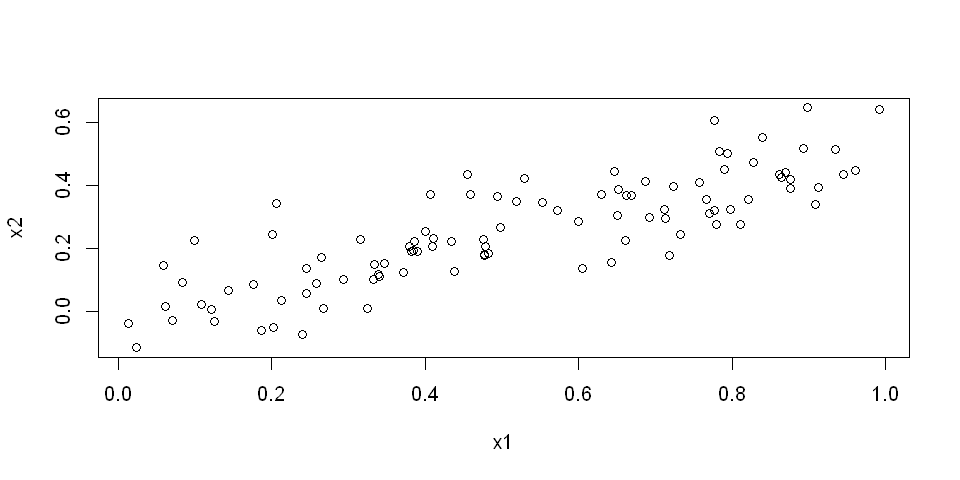

In [14]:
options(repr.plot.width=8, repr.plot.height=4) # resize IRkernel plot size
plot(x1,x2)
cor(x1,x2)

For parts C,D and E:
```
+----------+-----------+--------+--------+
|   model  | intercept |   x1   |   x2   |
+----------+-----------+--------+--------+
| baseline |         2 |      2 |    0.3 |
| x1+x2    |    2.1305 | 1.4396 | 1.0097 |
| x1       |    2.1124 | 1.9759 |      - |
| x2       |    2.3899 |      - | 2.8996 |
+----------+-----------+--------+--------+```

### Part 3C (checked together with 3D, 3E)

In [15]:
model3C <- lm(y~x1+x2)
summary(model3C)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


### Part 3D

In [16]:
model3D <- lm(y~x1)
summary(model3D)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


### Part 3E

In [17]:
model3E <- lm(y~x2)
summary(model3E)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


### Part 3F (c)

There is multicollinearity between the variables x1 and x2. In doing multiple regression, we see this effect where one of the coefficients is possibly hard to reject $H_0:\beta_1=0$ while we see in the single regression case that we can reject $H_0:\beta_1=0$. This is caused by multicollinearity here.

## Question 4
### Part 4A (c)

Based on results, all variables are statistically significant.

In [18]:
boston <- read.csv("csv/Boston.csv")
str(boston)

### FIRST METHOD: initialise empty data.frame to contain statistics of single regressions
results <- data.frame(name=character(),
                      variable=double(),
                      intercept=double(),
                      p=double(),
                      rsq=double(),
                      stringsAsFactors=FALSE)

### SECOND METHOD: initialise empty data.frame
# results <- data.frame(matrix(vector(), 0, 4,
#                     dimnames=list(c(), c("name", "variable", "intercept", "rsq"))),
#                     stringsAsFactors=F)


# for each predictor, generate single regression model and append model statistics to "results"
for (var in colnames(boston)) {
    if (var != "medv") {
        model4A <- lm(boston$medv~boston[[var]])
        model_stats <- data.frame(name = var,
                                  variable = coefficients(model4A)[[2]],
                                  intercept = coefficients(model4A)[[1]],
                                  p = coef(summary(model4A))[2,4],
                                  rsq = summary(model4A)$r.squared)
        results <- rbind(results, model_stats)
        
#         results[nrow(results) + 1,] <- c(var,
#                                          as.numeric(coefficients(model)[[2]]),
#                                          as.numeric(coefficients(model)[[1]]),
#                                          as.numeric(summary(model)$r.squared))
#         plot(boston[[var]],boston$medv, xlab=var, ylab="Median House Value")
}}

# transform column datatype to numeric
# for (i in colnames(results)[2:4]) {
#   results[[i]] <- as.numeric(results[[i]])
# }

# display results
str(results)
results




# get("crim")
# boston$medv
# (boston[,2])
# coefficients(model)[[2]]
# summary(model)$coefficients[2]
# boston[[var_idx]]
# class(colnames(boston))

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
'data.frame':	13 obs. of  5 variables:
 $ name     : Factor w/ 13 levels "crim","zn","indus",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ variable : num  -0.415 0.142 -0.648 6.

name,variable,intercept,p,rsq
crim,-0.41519028,24.03311,1.173987e-19,0.15078047
zn,0.14213999,20.91758,5.713584e-17,0.12992084
indus,-0.64849005,29.75490,4.900260e-31,0.23399003
chas,6.34615711,22.09384,7.390623e-05,0.03071613
nox,-33.91605501,41.34587,7.065042e-24,0.18260304
rm,9.10210898,-34.67062,2.487229e-74,0.48352546
age,-0.12316272,30.97868,1.569982e-18,0.14209474
dis,1.09161302,18.39009,1.206612e-08,0.06246437
rad,-0.40309540,26.38213,5.465933e-19,0.14563858
tax,-0.02556810,32.97065,5.637734e-29,0.21952592


### Part 4B (checked)

In [19]:
model4B <- lm(medv~., data=boston)
summary(model4B)


Call:
lm(formula = medv ~ ., data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

### Part 4C (checked)

,coefsNoIntercept,
crim,-1.080114e-01,-0.41519028
zn,4.642046e-02,0.14213999
indus,2.055863e-02,-0.64849005
chas,2.686734e+00,6.34615711
nox,-1.776661e+01,-33.91605501
rm,3.809865e+00,9.10210898
age,6.922246e-04,-0.12316272
dis,-1.475567e+00,1.09161302
rad,3.060495e-01,-0.40309540
tax,-1.233459e-02,-0.02556810


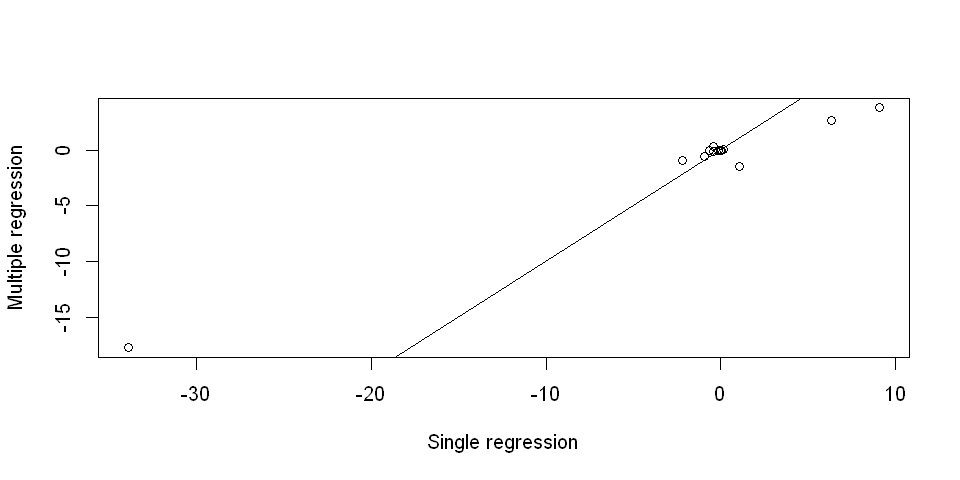

In [20]:
coefs <- coefficients(model4B) # extract coefs from multiple regression model
coefsNoIntercept <- coefs[2:NROW(coefs)] # removes offset coefficient
coefsNoIntercept <- cbind(coefsNoIntercept, results$variable) # append single regression coeffs as 2nd column
coefsNoIntercept # print table of coeffs

# plot multiregression coeffs vs single regression coeffs
plot(results$variable, coefsNoIntercept[,1], xlab="Single regression", ylab="Multiple regression")
abline(0,1) # symmetry line

## Question 5
### Part 5A (checked)

In [21]:
climate <- read.csv("csv/climate_change.csv")
str(climate)

# create disjoint training and validation sets
climate_train <- subset(climate, climate$Year <= 2006)
climate_test <- subset(climate, climate$Year > 2006)

# multiple regression model
model5A <- lm(Temp~MEI+CO2+CH4+N2O+CFC.11+CFC.12+TSI+Aerosols, data=climate_train)
summary(model5A)

'data.frame':	308 obs. of  11 variables:
 $ Year    : int  1983 1983 1983 1983 1983 1983 1983 1983 1984 1984 ...
 $ Month   : int  5 6 7 8 9 10 11 12 1 2 ...
 $ MEI     : num  2.556 2.167 1.741 1.13 0.428 ...
 $ CO2     : num  346 346 344 342 340 ...
 $ CH4     : num  1639 1634 1633 1631 1648 ...
 $ N2O     : num  304 304 304 304 304 ...
 $ CFC.11  : num  191 192 193 194 194 ...
 $ CFC.12  : num  350 352 354 356 357 ...
 $ TSI     : num  1366 1366 1366 1366 1366 ...
 $ Aerosols: num  0.0863 0.0794 0.0731 0.0673 0.0619 0.0569 0.0524 0.0486 0.0451 0.0416 ...
 $ Temp    : num  0.109 0.118 0.137 0.176 0.149 0.093 0.232 0.078 0.089 0.013 ...



Call:
lm(formula = Temp ~ MEI + CO2 + CH4 + N2O + CFC.11 + CFC.12 + 
    TSI + Aerosols, data = climate_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25888 -0.05913 -0.00082  0.05649  0.32433 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.246e+02  1.989e+01  -6.265 1.43e-09 ***
MEI          6.421e-02  6.470e-03   9.923  < 2e-16 ***
CO2          6.457e-03  2.285e-03   2.826  0.00505 ** 
CH4          1.240e-04  5.158e-04   0.240  0.81015    
N2O         -1.653e-02  8.565e-03  -1.930  0.05467 .  
CFC.11      -6.631e-03  1.626e-03  -4.078 5.96e-05 ***
CFC.12       3.808e-03  1.014e-03   3.757  0.00021 ***
TSI          9.314e-02  1.475e-02   6.313 1.10e-09 ***
Aerosols    -1.538e+00  2.133e-01  -7.210 5.41e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09171 on 275 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7436 
F-statistic: 103.6 on 8 and 275 DF

### Part 5B

All variables are significant except **CH4** and **N2O**, were the criterion for significance be $p<0.05$.

### Part 5C (checked)

The third explanation is correct. All of the gas concentration variables reflect human development - **N2O** and **CFC.11** are correlated with other variables in the dataset.

### Part 5D  (checked)

In [22]:
model5D <- lm(Temp~MEI+TSI+Aerosols+N2O, data=climate_train)
summary(model5D)


Call:
lm(formula = Temp ~ MEI + TSI + Aerosols + N2O, data = climate_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27916 -0.05975 -0.00595  0.05672  0.34195 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.162e+02  2.022e+01  -5.747 2.37e-08 ***
MEI          6.419e-02  6.652e-03   9.649  < 2e-16 ***
TSI          7.949e-02  1.487e-02   5.344 1.89e-07 ***
Aerosols    -1.702e+00  2.180e-01  -7.806 1.19e-13 ***
N2O          2.532e-02  1.311e-03  19.307  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09547 on 279 degrees of freedom
Multiple R-squared:  0.7261,	Adjusted R-squared:  0.7222 
F-statistic: 184.9 on 4 and 279 DF,  p-value: < 2.2e-16


### Part 5E (checked)

In [23]:
model5E <- step(model5A)
summary(model5E)

Start:  AIC=-1348.16
Temp ~ MEI + CO2 + CH4 + N2O + CFC.11 + CFC.12 + TSI + Aerosols

           Df Sum of Sq    RSS     AIC
- CH4       1   0.00049 2.3135 -1350.1
<none>                  2.3130 -1348.2
- N2O       1   0.03132 2.3443 -1346.3
- CO2       1   0.06719 2.3802 -1342.0
- CFC.12    1   0.11874 2.4318 -1335.9
- CFC.11    1   0.13986 2.4529 -1333.5
- TSI       1   0.33516 2.6482 -1311.7
- Aerosols  1   0.43727 2.7503 -1301.0
- MEI       1   0.82823 3.1412 -1263.2

Step:  AIC=-1350.1
Temp ~ MEI + CO2 + N2O + CFC.11 + CFC.12 + TSI + Aerosols

           Df Sum of Sq    RSS     AIC
<none>                  2.3135 -1350.1
- N2O       1   0.03133 2.3448 -1348.3
- CO2       1   0.06672 2.3802 -1344.0
- CFC.12    1   0.13023 2.4437 -1336.5
- CFC.11    1   0.13938 2.4529 -1335.5
- TSI       1   0.33500 2.6485 -1313.7
- Aerosols  1   0.43987 2.7534 -1302.7
- MEI       1   0.83118 3.1447 -1264.9



Call:
lm(formula = Temp ~ MEI + CO2 + N2O + CFC.11 + CFC.12 + TSI + 
    Aerosols, data = climate_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25770 -0.05994 -0.00104  0.05588  0.32203 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.245e+02  1.985e+01  -6.273 1.37e-09 ***
MEI          6.407e-02  6.434e-03   9.958  < 2e-16 ***
CO2          6.402e-03  2.269e-03   2.821 0.005129 ** 
N2O         -1.602e-02  8.287e-03  -1.933 0.054234 .  
CFC.11      -6.609e-03  1.621e-03  -4.078 5.95e-05 ***
CFC.12       3.868e-03  9.812e-04   3.942 0.000103 ***
TSI          9.312e-02  1.473e-02   6.322 1.04e-09 ***
Aerosols    -1.540e+00  2.126e-01  -7.244 4.36e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09155 on 276 degrees of freedom
Multiple R-squared:  0.7508,	Adjusted R-squared:  0.7445 
F-statistic: 118.8 on 7 and 276 DF,  p-value: < 2.2e-16


### Part 5F (checked)

In [24]:
predict5F <- predict(model5E, climate_test)
# table(predict5F, climate_test$Year)

# calculate SSE/SST for R-squared value
sse5F <- sum((climate_test$Temp-predict5F)^2)
sst5F <- sum((climate_test$Temp-mean(climate_train$Temp))^2)
rsq5F <- 1 - (sse5F/sst5F)
rsq5F

[1] 0.6286051

## Question 6
### Part 6A (c)

In [25]:
wine <- read.csv("csv/winedata.csv")
wine$age91 <- 1991 - wine$vintage
wine$age92 <- 1992 - wine$vintage
str(wine)

# average price of wine 15 years or older at time of 1991 auction
mean(wine$price91[wine$age91>=15])

'data.frame':	25 obs. of  9 variables:
 $ vintage : int  1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 ...
 $ price91 : num  131.5 156 118 92.8 119.6 ...
 $ price92 : num  132 181 180 115 157 ...
 $ temp    : num  18.8 18.8 18 NA 18.6 ...
 $ hrain   : num  20.3 41 42.1 41.1 0.5 ...
 $ wrain   : num  328 411 453 372 374 ...
 $ tempdiff: num  7.36 7.21 6.84 7.76 8.38 7.26 6.88 7.2 6.58 7.47 ...
 $ age91   : num  30 29 28 27 26 25 24 23 22 21 ...
 $ age92   : num  31 30 29 28 27 26 25 24 23 22 ...


[1] 96.43563

### Part 6B (c)

In [26]:
mean(wine$price91[wine$hrain<mean(wine$hrain) & wine$tempdiff<mean(wine$tempdiff)])

[1] 72.86714

### Part 6C (c)

$R^2=0.6675$

In [27]:
wine$price91log <- log(wine$price91) # get log of prices of wine auctioned in 1991
wine$price92log <- log(wine$price92) # get log of prices of wine auctioned in 1992

# get disjoint training/test sets
wine_train <- subset(wine, wine$vintage<=1981)
wine_test <- subset(wine, wine$vintage>1981)
model6C <- lm(price91log~age91, data=wine_train)
summary(model6C)


Call:
lm(formula = price91log ~ age91, data = wine_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26897 -0.13328  0.01939  0.10452  0.41913 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.571442   0.144163  24.774 6.30e-16 ***
age91       0.042610   0.006899   6.176 6.19e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1914 on 19 degrees of freedom
Multiple R-squared:  0.6675,	Adjusted R-squared:   0.65 
F-statistic: 38.15 on 1 and 19 DF,  p-value: 6.188e-06


### Part 6D (c)

In [28]:
confint(model6C, level=0.99)

,0.5 %,99.5 %
(Intercept),3.15900093,3.98388288
age91,0.02287254,0.06234705


### Part 6E (c)

In [29]:
predict6E <- predict(model6C, wine_test[wine_test$vintage<=1991])

predict6E

sse6E <- sum((predict6E - wine_test$price91log)^2)
sst6E <- sum((wine_test$price91log - mean(wine_train$price91log))^2)
rsq_test6E <- 1 - (sse6E/sst6E)
rsq_test6E


22       23       24       25 
3.954930 3.912320 3.869710 3.827101

[1] 0.9213742

### Part 6F

The result indicates that the variation of the prices of the wines in this dataset is explained much more by the age of the wine in comparison to Bordeaux wines.

### Part 6G (c)

In [30]:
model6G <- lm(price91log~age91+temp+hrain+wrain+tempdiff, data=wine_train)
summary(model6G)


Call:
lm(formula = price91log ~ age91 + temp + hrain + wrain + tempdiff, 
    data = wine_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32298 -0.07019 -0.01634  0.11051  0.24455 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.2626138  1.4914578   1.517   0.1532    
age91        0.0482331  0.0075346   6.402 2.34e-05 ***
temp         0.1135015  0.0734344   1.546   0.1462    
hrain       -0.0028825  0.0016205  -1.779   0.0987 .  
wrain        0.0002520  0.0003918   0.643   0.5313    
tempdiff    -0.1213280  0.1445947  -0.839   0.4166    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1803 on 13 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7938,	Adjusted R-squared:  0.7145 
F-statistic: 10.01 on 5 and 13 DF,  p-value: 0.000421


### Part 6H & 6I (c)

Model6G will be preferred to Model6C given it has a higher adjusted $r^2$-value of $0.7145$ as opposed to $0.65$ with **age91** as the only predictor variable. Should this model be accepted, we would find that it indicates an inverse relation between the **hrain** and **price91log**.

### Part 6J (c)

**Tempdiff** and **wrain** are dropped.

In [31]:
model6J <- lm(price91log~age91+temp+hrain, data=wine_train)
summary(model6J)


Call:
lm(formula = price91log ~ age91 + temp + hrain, data = wine_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32198 -0.09905  0.00491  0.14536  0.29828 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.801013   1.297697   1.388    0.185    
age91        0.045670   0.006702   6.814 5.85e-06 ***
temp         0.097500   0.068750   1.418    0.177    
hrain       -0.001983   0.001236  -1.604    0.130    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1752 on 15 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7753,	Adjusted R-squared:  0.7304 
F-statistic: 17.26 on 3 and 15 DF,  p-value: 3.973e-05


### Part 6K (c)

Given Model6J's $R^2$-value of $0.7304$, which is larger than that of Model6G's at $0.7145$, the most recent model is preferred.

### Part 6L (c)

In [32]:
model6L <- lm(price92log~age92+temp+hrain, data=wine_train)
summary(model6L)


Call:
lm(formula = price92log ~ age92 + temp + hrain, data = wine_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29394 -0.15545  0.03238  0.10221  0.37661 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.723393   1.574961   1.729 0.104296    
age92        0.035237   0.008124   4.338 0.000586 ***
temp         0.072494   0.083333   0.870 0.398043    
hrain       -0.001539   0.001498  -1.027 0.320713    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2123 on 15 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.5834,	Adjusted R-squared:  0.5001 
F-statistic: 7.002 on 3 and 15 DF,  p-value: 0.003621


### Part 6M (c)

No, I would not reject the null hypothesis that the **hrain** $=0$, because its p-value of $0.320713$ is greater than the $80\%$ confidence level determined.

### Part 6N (c)

By separately estimating the equations for the wine prices for each auction, we can better establish the credibility of the explanatory variables because the effect of the weather variables and age of the wine (sign of the estimated coefficients) can be checked for consistency across years.

### Part 6O

Clearly dropping missing entries is reliable. However, should there be too many missing entries, dropping them will omit a lot of datarows for use in the training and test sets, affecting the reliability and accuracy of our model.

## Question 7
### Part 7A (c)

In [39]:
batters <- read.csv("csv/batters.csv")
str(batters)

# subset relevant year's statistics
batters96 <- subset(batters, batters$year==1996)
batters06 <- subset(batters, batters$year==2006)

# get player with highest salary in 2006
batters[batters$salary==max(batters$salary),]

'data.frame':	1770 obs. of  14 variables:
 $ playerID: Factor w/ 1474 levels "aardsda01","abbotku01",..: 2 3 5 6 7 8 10 11 11 12 ...
 $ yearID  : int  1996 1996 1996 1996 1996 1996 1996 1996 1996 1996 ...
 $ teamID  : Factor w/ 33 levels "ARI","ATL","BAL",..: 12 13 23 12 7 23 18 11 18 3 ...
 $ G       : int  109 15 22 9 69 12 19 11 25 54 ...
 $ AB      : int  320 22 NA 0 6 NA NA NA NA 68 ...
 $ R       : int  37 1 NA 0 0 NA NA NA NA 6 ...
 $ H       : int  81 5 NA 0 0 NA NA NA NA 7 ...
 $ X2B     : int  18 1 NA 0 0 NA NA NA NA 0 ...
 $ X3B     : int  7 0 NA 0 0 NA NA NA NA 0 ...
 $ HR      : int  8 0 NA 0 0 NA NA NA NA 0 ...
 $ BB      : int  22 2 NA 0 1 NA NA NA NA 3 ...
 $ HBP     : int  3 0 NA 0 0 NA NA NA NA 0 ...
 $ SF      : int  0 0 NA 0 0 NA NA NA NA 0 ...
 $ salary  : int  650000 150000 165000 151000 215000 157500 3075000 225000 225000 205000 ...


,playerID,yearID,teamID,G,AB,R,H,X2B,X3B,HR,BB,HBP,SF,salary
1159,giambja01,2006,NYA,139,446,92,113,25,0,37,110,16,7,23428571


### Part 7B (c)

In [34]:
# get ratio of max to min salary in year 2006
max(batters06$salary)/min(batters06$salary)

[1] 61.65413

### Part 7C & 7D (c)

In [49]:
# tapply is very useful here in summing over indexes
?tapply
sort(tapply(batters96$salary, batters96$teamID, sum))

OAK      MIN      KCA      PIT      CAL      ML4      MON      CHN 
23380333 23632500 24285000 28411667 30474500 30574338 33087500 35139004 
     DET      FLO      NYN      TOR      SFN      PHI      HOU      CIN 
35181000 36982000 37561150 37857333 38197380 38682500 39580000 40065000 
     SDN      COL      SLN      SEA      LAN      TEX      BOS      CHA 
41141672 41884667 43622667 45319494 45983304 51743005 51776167 53703500 
     CLE      ATL      BAL      NYA 
63646793 64987500 65094734 73661183

### Part 7E (c)

Most of the salaries are large, with a relatively small number of much smaller salaries (this is referred to as "left-skewed").

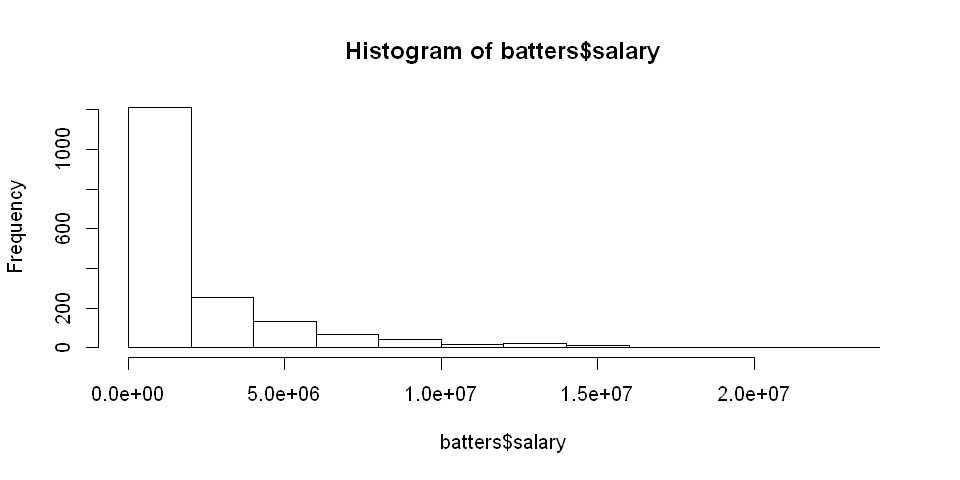

In [36]:
hist(batters$salary)

### Part 7F (c)

Given $R=0$, $log_e(salary)=13.42$

In [51]:
model7F <- lm(log(salary)~R+1, data=batters)
summary(model7F)


Call:
lm(formula = log(salary) ~ R + 1, data = batters)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8332 -0.8636 -0.1999  0.8610  3.1706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.417505   0.037924  353.80   <2e-16 ***
R            0.014991   0.000872   17.19   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.192 on 1591 degrees of freedom
  (177 observations deleted due to missingness)
Multiple R-squared:  0.1567,	Adjusted R-squared:  0.1561 
F-statistic: 295.5 on 1 and 1591 DF,  p-value: < 2.2e-16


### Part 7G (c)

Q: What is the actual average of the logarithm of the salary of batters who score 0 runs in a season in the dataset? Remember to drop missing entries in computing this number.

A: Actual average is 14.37

In [67]:
# actual average
mean(log(batters$salary[batters$R==0]), na.rm=T)

[1] 13.60544

### Part 7H (c)

The results are close. The reason for this is due to the fact that taking the average log(salary) is identical to fitting a distribution of log(salary)=intercept, which accounts for the variation in log(salary) values of the two parts.

### Part 7I (c)

New salary = Old salary x $\beta_1$

### Part 7J (c)

In [68]:
batters$OBP <- (batters$H+batters$BB+batters$HBP)/(batters$AB+batters$BB+batters$HBP+batters$SF)
batters$SLG <- (batters$H+batters$X2B+2*batters$X3B+3*batters$HR)/(batters$AB)
mean(batters$OBP[batters$yearID==2006], na.rm=T)

[1] 0.2707986

### Part 7K (c)

Cannot reject null hypothesis that means are the same.

In [70]:
# if one specifies the second parameter, it will be a two-sided test, else one-sided
t.test(batters$SLG[batters$yearID==1996], batters$SLG[batters$yearID==2006])
# ?t.test


	Welch Two Sample t-test

data:  batters$SLG[batters$yearID == 1996] and batters$SLG[batters$yearID == 2006]
t = 0.83382, df = 1340.7, p-value = 0.4045
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01199352  0.02972624
sample estimates:
mean of x mean of y 
0.3397733 0.3309069 


### Part 7L (c)

In [74]:
model7L <- lm(log(salary)~OBP+SLG, data = subset(batters, batters$AB>=130 & batters$year==1996))
summary(model7L)


Call:
lm(formula = log(salary) ~ OBP + SLG, data = subset(batters, 
    batters$AB >= 130 & batters$year == 1996))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57574 -0.72714  0.00619  0.81281  2.72423 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8095     0.4842  20.258  < 2e-16 ***
OBP           4.8775     1.8961   2.572   0.0105 *  
SLG           5.4607     0.8989   6.075 3.35e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.055 on 338 degrees of freedom
Multiple R-squared:  0.2633,	Adjusted R-squared:  0.2589 
F-statistic: 60.39 on 2 and 338 DF,  p-value: < 2.2e-16


### Part 7M

No, cannot reject since for $\forall\:p$, $p<0.05$

### Part 7N (c)

In [75]:
model7N <- lm(log(salary)~OBP+SLG, data = subset(batters, batters$AB>=130 & batters$year==2006))
summary(model7N)


Call:
lm(formula = log(salary) ~ OBP + SLG, data = subset(batters, 
    batters$AB >= 130 & batters$year == 2006))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7655 -1.0813  0.1921  0.9722  2.3209 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.9822     0.5647  19.448  < 2e-16 ***
OBP           6.6440     2.2181   2.995  0.00294 ** 
SLG           2.9093     1.1125   2.615  0.00930 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.152 on 350 degrees of freedom
Multiple R-squared:  0.1214,	Adjusted R-squared:  0.1164 
F-statistic: 24.19 on 2 and 350 DF,  p-value: 1.443e-10


### Part 7O (c)

The market undervalued the OBP statistic relative to the SLG statistic in 1996 before Moneyball was published. This has been corrected in 2006.